In [2]:
from IPython.display import display, HTML
# from ipywidgets import interactive
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
from tqdm.notebook import tqdm

from collections import namedtuple, defaultdict, Counter
from glob import glob
import itertools
import os
import pickle
import re
import socket
import subprocess
import sys

plt.style.use('seaborn')
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
np.set_printoptions(suppress=True, precision=2, threshold=20)
sys.path += ['../src/']

display(HTML("<h3>Runned on %s</h3><h4>Last commit: %s</h4><h4>Conda env: %s</h4>" % (
    socket.gethostname(),
    subprocess.run(["git","log", "-1", "--pretty=%h %s"],
        check=False, capture_output=True).stdout.decode() or 'none.',
    (re.findall(""".*envs[\\\/](.*?)[\\\/]""", sys.executable) or [sys.executable])[0]
)))


In [3]:
df_experiments = pd.read_csv("../data/main-figure-experiments.csv")

In [4]:
metrics = [
    "metrics.r2_score_M",
    "metrics.r2_score_Nd",
    "metrics.r2_score_P",
    "metrics.r2_score_Db",
]

In [5]:
df = df_experiments[["Model"] + metrics].melt(id_vars=['Model'], value_vars=metrics)
df.variable = df.variable.astype('category')
df.Model = df.Model.astype('category')
df.variable = (df.variable
               .str.replace("metrics.pearson_", "")
               .str.replace("metrics.r2_score_", "")
               .apply(lambda x: "D^B" if x == "Db" else "D" if x == "Nd" else x)
               .apply(lambda x: '$' + x + '$')
              )
df

/Users/corrado/.conda/envs/learnable-econ-abm/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/Users/corrado/.conda/envs/learnable-econ-abm/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Model,variable,value
0,original,$M$,-0.130794
1,original,$M$,0.169643
2,original,$M$,0.445487
3,original,$M$,-0.005293
4,original,$M$,0.222546
...,...,...,...
71,learnable,$D^B$,0.760010
72,learnable,$D^B$,0.754456
73,learnable,$D^B$,0.782150
74,learnable,$D^B$,0.779995


In [6]:
df.variable.unique()

array(['$M$', '$D$', '$P$', '$D^B$'], dtype=object)

In [7]:
def define_palette():
    (blue, orange, green, red, purple, 
     brown, pink, gray, gold, azure) = sns.color_palette('deep')
    return {
        '$M$': blue,
        '$D^B$': red,
        '$D$': green,
        '$P$': brown,
    }
display(sns.color_palette('deep'))
palette = define_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [8]:
! mkdir -p ../paper/fig

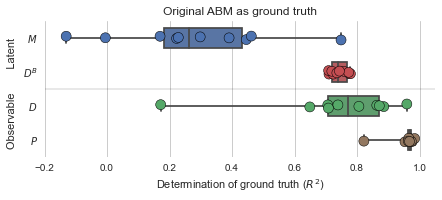

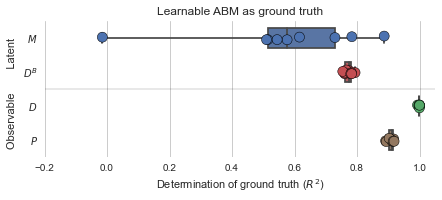

In [11]:
order = ['$M$', '$D^B$', '$D$', '$P$']
for model in df.Model.unique():
    sns.set_style("whitegrid")
    plt.figure(figsize=(7,2.5))
    
    ax = sns.boxplot(x="value", y='variable',
                     data=df[df.Model == model],
                     whis=[0, 100],
                     width=.6,
                     order=order,
                     palette=palette,
                    )
    sns.stripplot(x="value", y='variable',
                  data=df[df.Model == model],
                  size=10, jitter=0.06,
                  edgecolor="black",
                  linewidth=0.5,
                  order=order,
                  palette=palette,
                 )

    # metric_label = r'$\rho(%s, \hat{%s})$' % (label, label)
#     plt.xlabel("Correlation with ground truth")
    plt.xlabel("Determination of ground truth ($R^2$)")
    plt.xlim((-.2, 1.05))
    plt.ylabel("Observable        Latent")
    ax.yaxis.set_label_coords(-0.07, 0.47)
    plt.title(model.title() + " ABM as ground truth")
    plt.axhline(y=1.5, color='k', linestyle='-', alpha=0.1)

    for ext in ('pdf', 'png'):
        plt.savefig(f"../paper/fig/estimate-{model}.{ext}",
                        bbox_inches='tight', dpi=200)
    plt.show()